In [14]:
import tensorflow as tf
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
plt.rcParams['font.family'] = 'Avenir'

In [3]:
tf.__version__

'2.15.0'

In [5]:
# Load dataset
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [6]:
# Examine the data
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [7]:
import numpy as np
np.set_printoptions(linewidth=120)
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

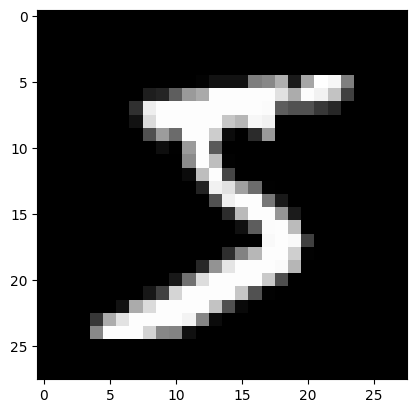

In [8]:
plt.imshow(X_train[0], cmap='gray')

In [9]:
y_train[0]

5

In [11]:
# Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

In [12]:
# Summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               200960    
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203530 (795.04 KB)
Trainable params: 203530 (795.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
# Compile
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [14]:
# Train
history = model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 983us/step - loss: 2.5136 - accuracy: 0.8870
Epoch 2/5
1875/1875 [==============================] - 2s 998us/step - loss: 0.3450 - accuracy: 0.9252
Epoch 3/5
1875/1875 [==============================] - 2s 939us/step - loss: 0.2703 - accuracy: 0.9377
Epoch 4/5
1875/1875 [==============================] - 2s 904us/step - loss: 0.2370 - accuracy: 0.9438
Epoch 5/5
1875/1875 [==============================] - 2s 918us/step - loss: 0.2284 - accuracy: 0.9470


Text(0.5, 0, 'Epoch')

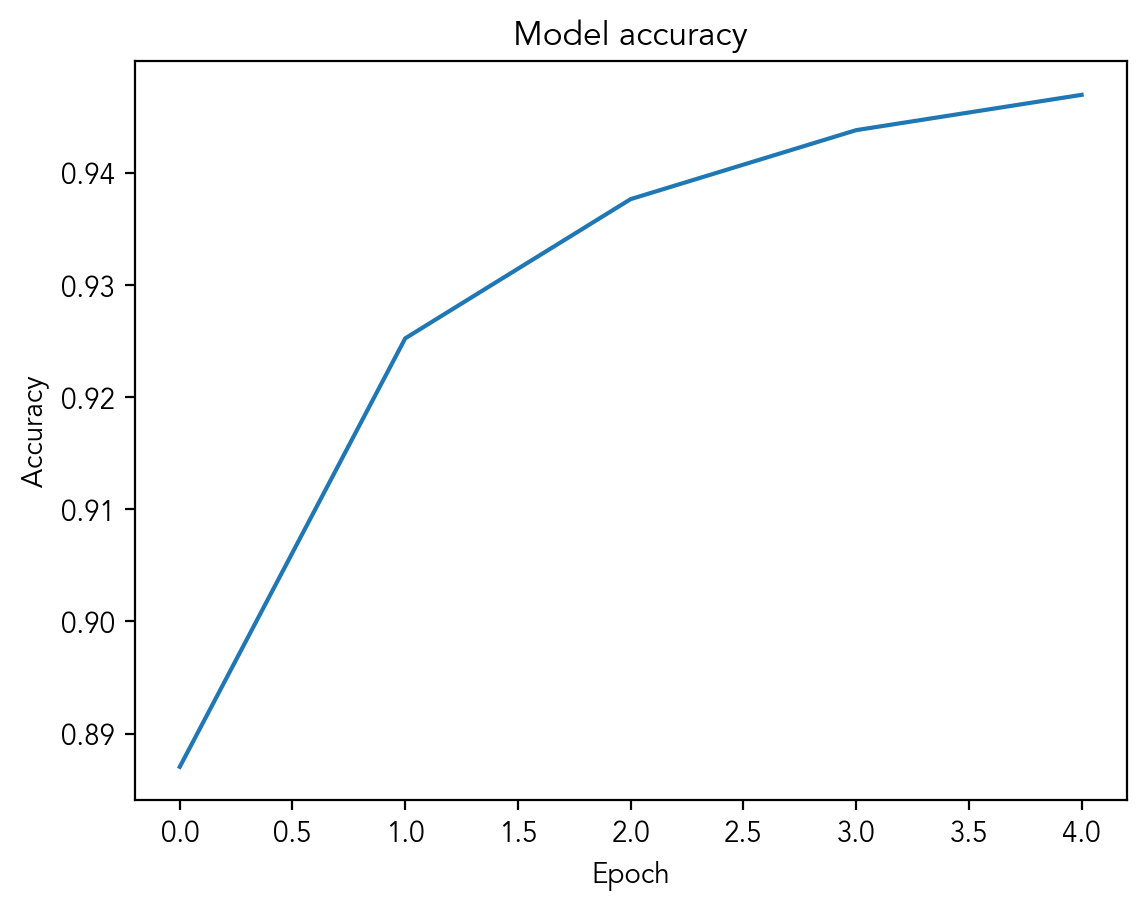

In [20]:
# Evaluate
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

Text(0.5, 0, 'Epoch')

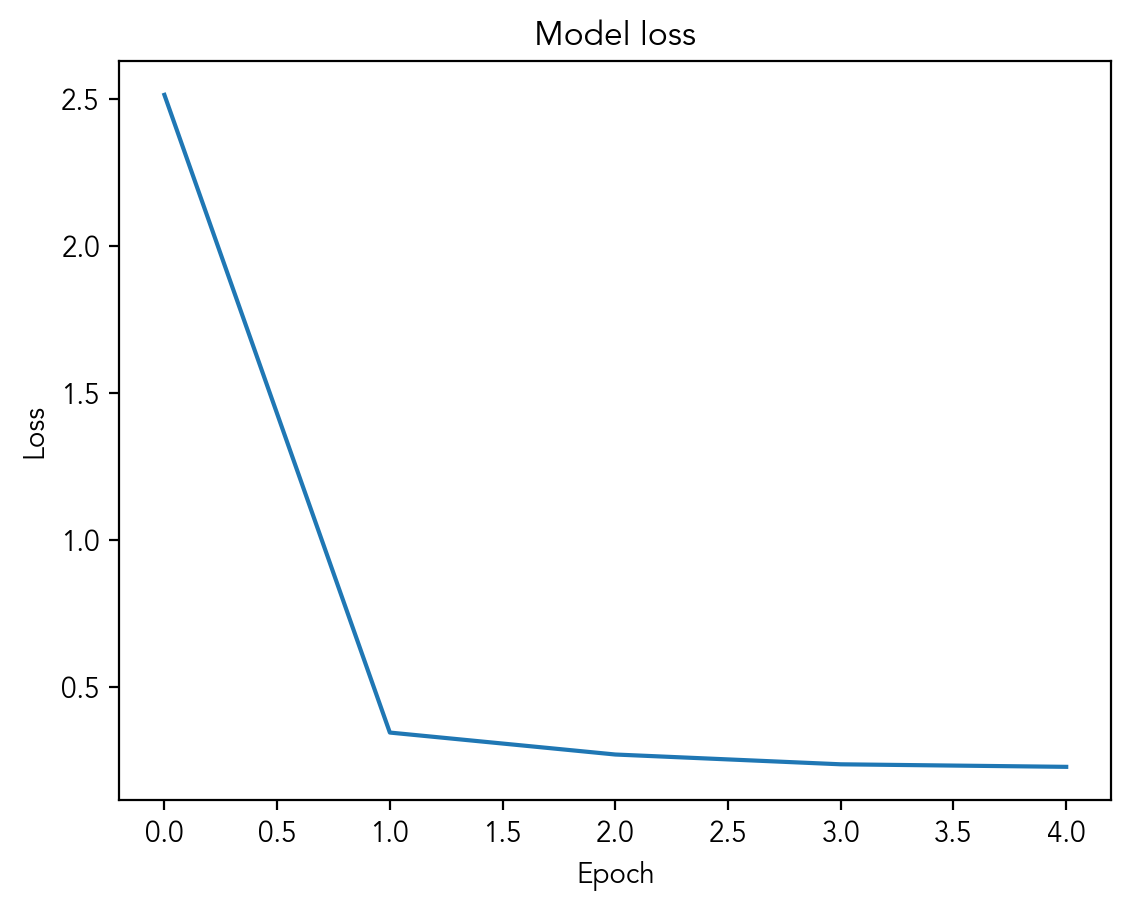

In [21]:
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [23]:
# Feshion MNIST
mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [24]:
# Normalize
X_train = X_train / 255.0
X_test = X_test / 255.0

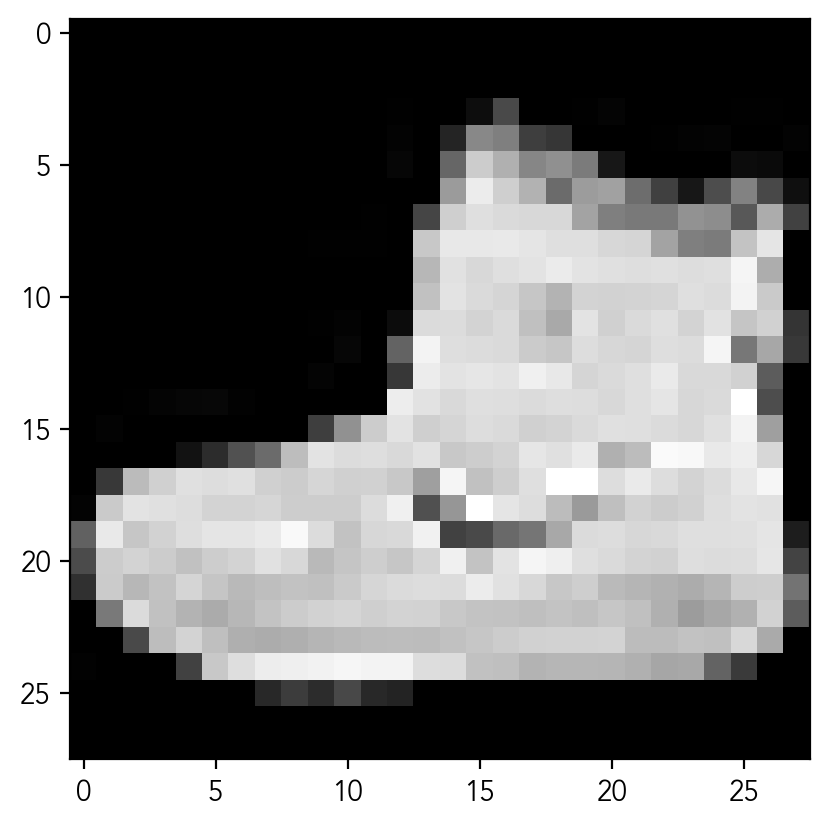

In [25]:
# Examine the data
plt.imshow(X_train[0], cmap='gray')

In [26]:
y_train[0]

9

In [27]:
# Labels
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
classes[y_train[0]]

'Ankle boot'

T-shirt/top


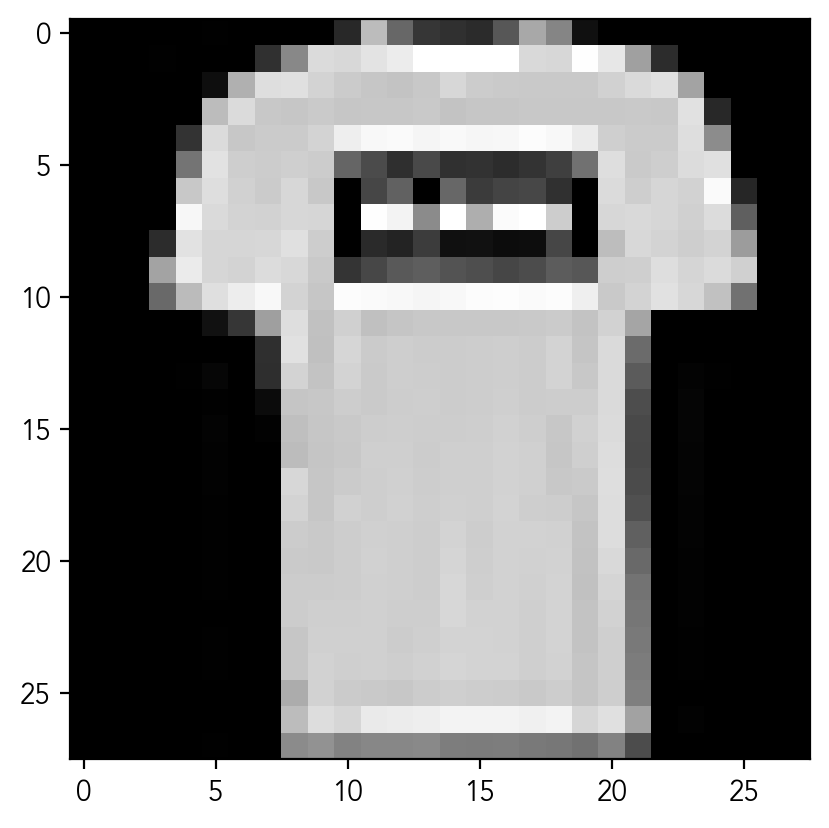

In [30]:
print(classes[y_train[1]])
plt.imshow(X_train[1], cmap='gray')

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

# Model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

# Compile
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [32]:
# Train
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5253 - accuracy: 0.8124 - val_loss: 0.4181 - val_accuracy: 0.8473
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3974 - accuracy: 0.8547 - val_loss: 0.4044 - val_accuracy: 0.8490
Epoch 3/10
1875/1875 [==============================] - 2s 946us/step - loss: 0.3641 - accuracy: 0.8668 - val_loss: 0.3660 - val_accuracy: 0.8695
Epoch 4/10
1875/1875 [==============================] - 2s 951us/step - loss: 0.3436 - accuracy: 0.8735 - val_loss: 0.3608 - val_accuracy: 0.8697
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3252 - accuracy: 0.8798 - val_loss: 0.3537 - val_accuracy: 0.8694
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3156 - accuracy: 0.8839 - val_loss: 0.3425 - val_accuracy: 0.8786
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3046 - accuracy: 0.8878 - val_loss: 0.3368 - val_accur

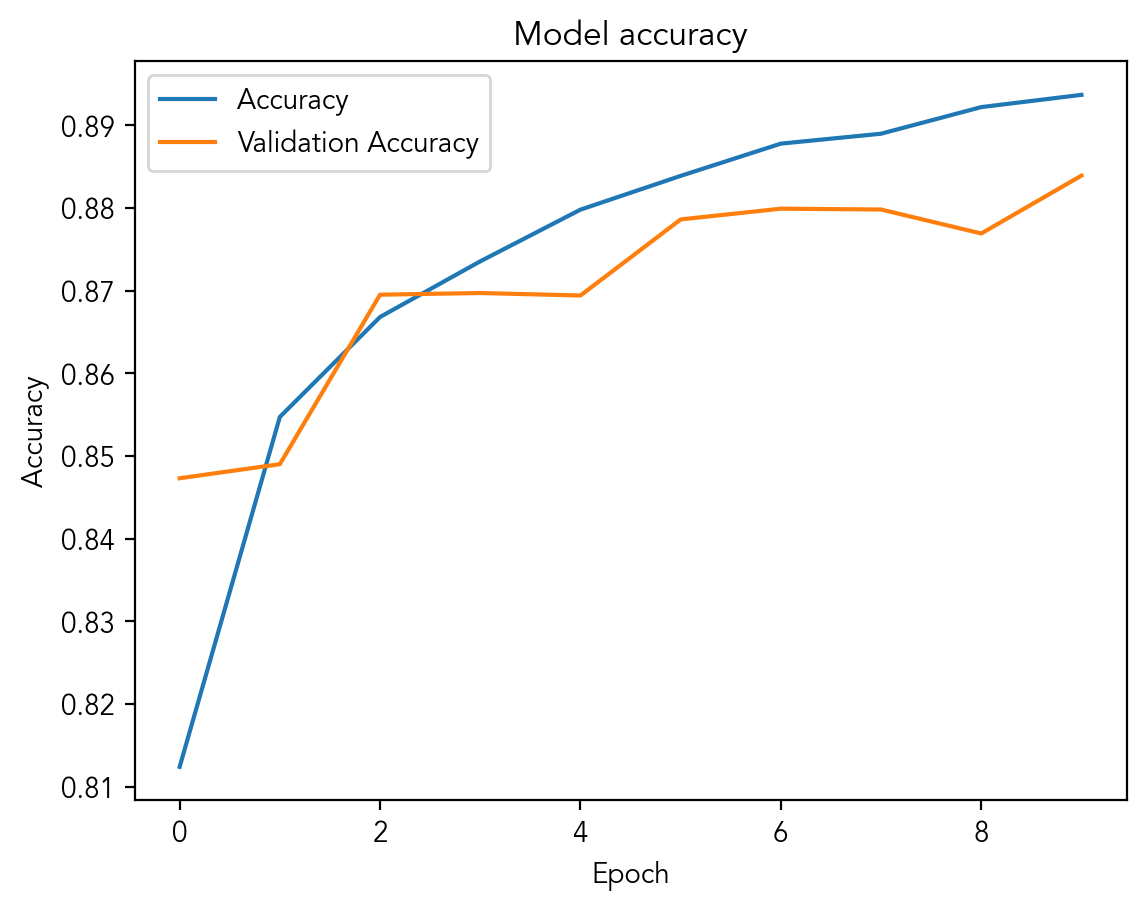

In [35]:
# Evaluate
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'Validation Accuracy'], loc='upper left')

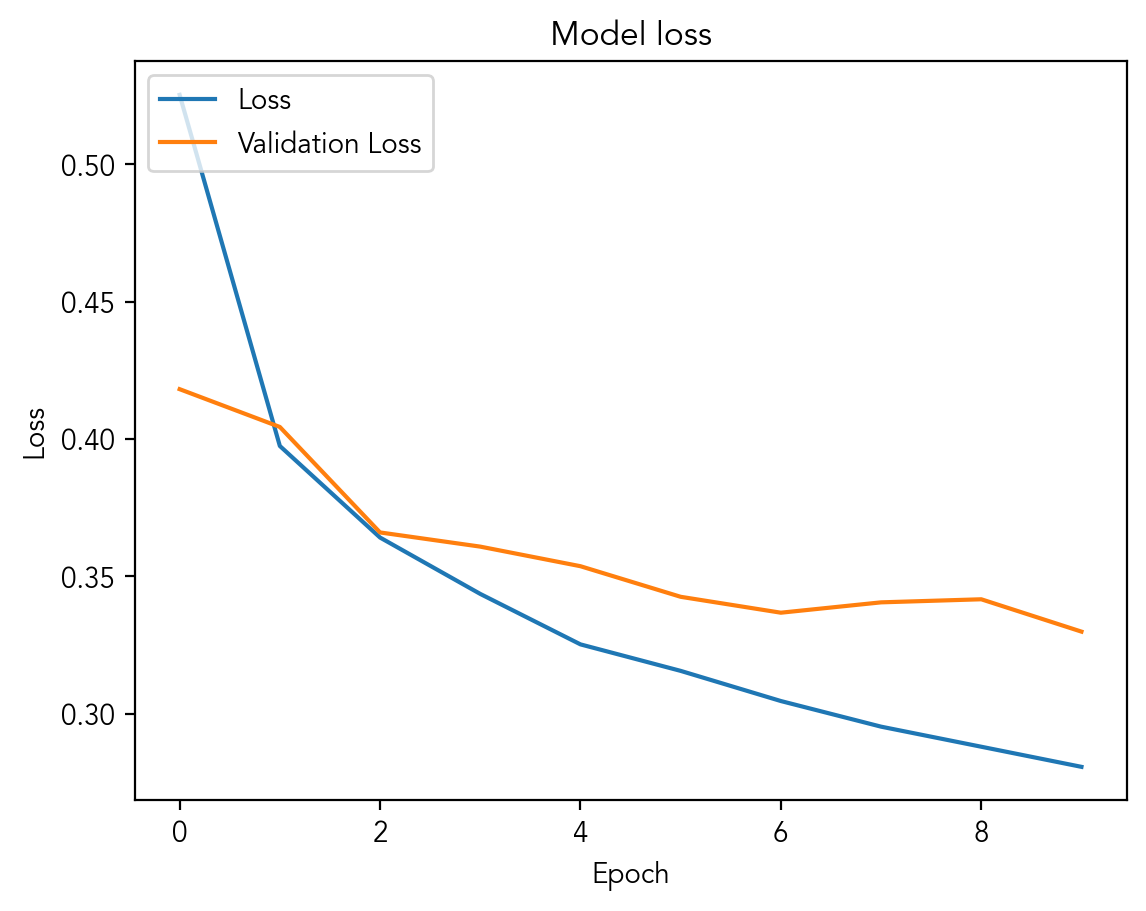

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Validation Loss'], loc='upper left')

In [37]:
# Predict
pred = model.predict(X_test)
pred[0]

313/313 [==============================] - 0s 527us/step


array([1.0087306e-04, 2.1482273e-07, 3.9866339e-07, 1.2445751e-07, 3.4179422e-07, 4.0121931e-03, 2.0667233e-06,
       5.6528110e-02, 1.7133852e-06, 9.3935400e-01], dtype=float32)

In [38]:
np.argmax(pred[0])

9

In [39]:
classes[np.argmax(pred[0])]

'Ankle boot'

In [40]:
classes[y_test[0]]

'Ankle boot'

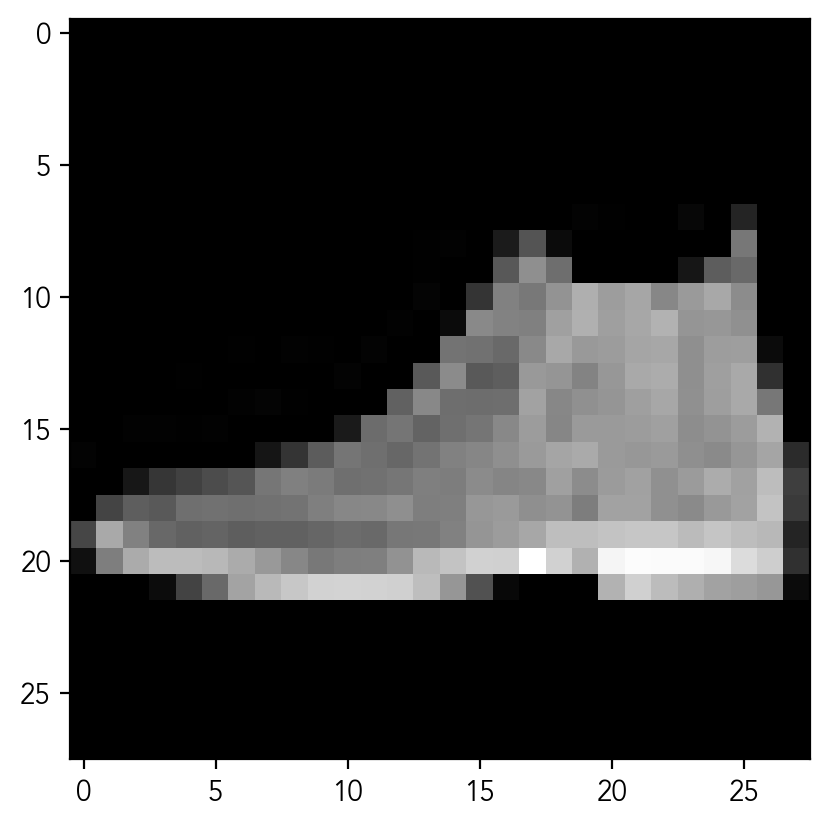

In [41]:
plt.imshow(X_test[0], cmap='gray')

In [1]:
# CNN

In [11]:
# Import libraries
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential

# Load dataset
mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Shape
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

# Normalize
X_train = X_train / 255.0
X_test = X_test / 255.0 

# Model
model = Sequential([
                    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
                    MaxPooling2D((2, 2)),
                    Conv2D(64, (3, 3), activation='relu'),
                    MaxPooling2D((2, 2)),
                    Conv2D(64, (3, 3), activation='relu'),
                    MaxPooling2D((2, 2)),
                    Flatten(),
                    Dense(64, activation='relu'),
                    Dense(10, activation='softmax')
])

# Compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 1, 1, 64)         

In [13]:
# Train
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.6037 - accuracy: 0.7769 - val_loss: 0.4893 - val_accuracy: 0.8228
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.4166 - accuracy: 0.8469 - val_loss: 0.4072 - val_accuracy: 0.8525
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3586 - accuracy: 0.8695 - val_loss: 0.3666 - val_accuracy: 0.8658
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3213 - accuracy: 0.8813 - val_loss: 0.3420 - val_accuracy: 0.8765
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2943 - accuracy: 0.8913 - val_loss: 0.3245 - val_accuracy: 0.8813
Epoch 6/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2726 - accuracy: 0.8993 - val_loss: 0.3318 - val_accuracy: 0.8792
Epoch 7/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2517 - accuracy: 0.9072 - val_loss: 0.3194 - val_ac

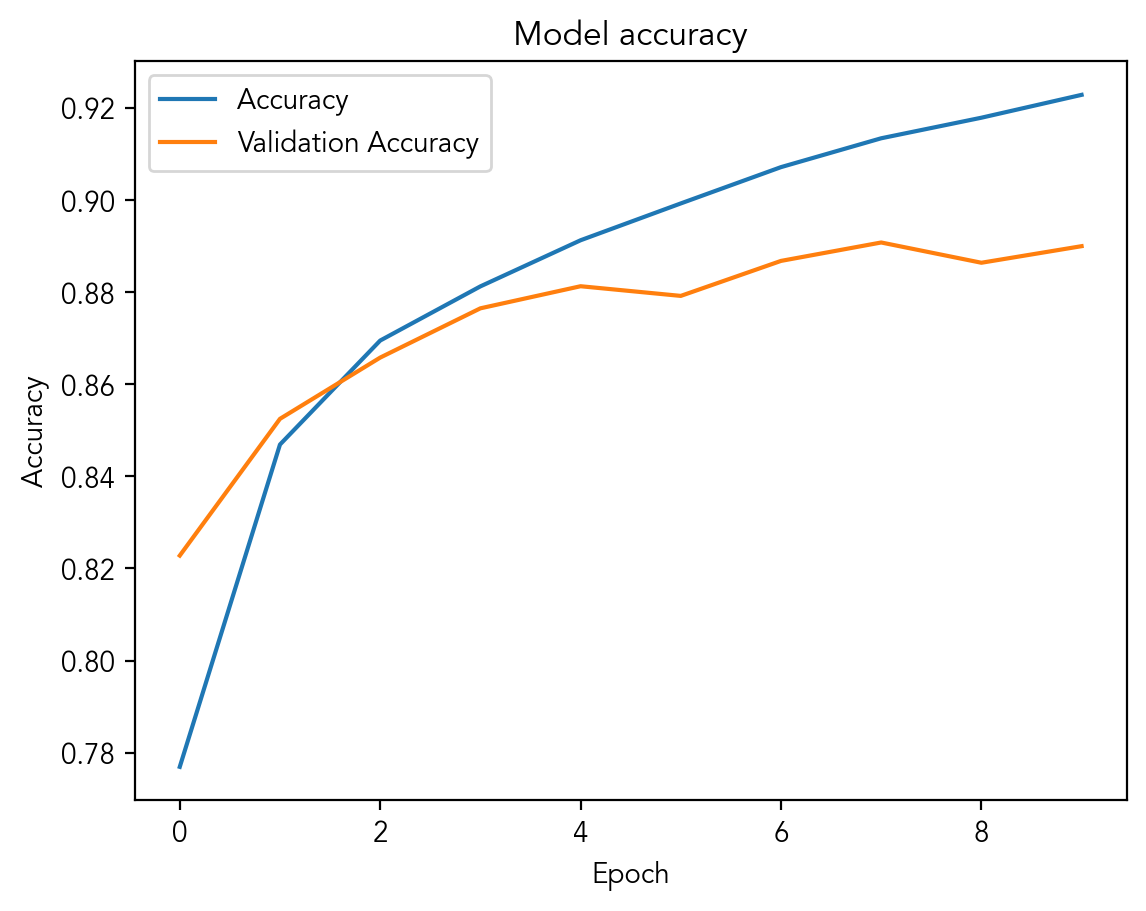

In [15]:
# Evaluate
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'Validation Accuracy'], loc='upper left')

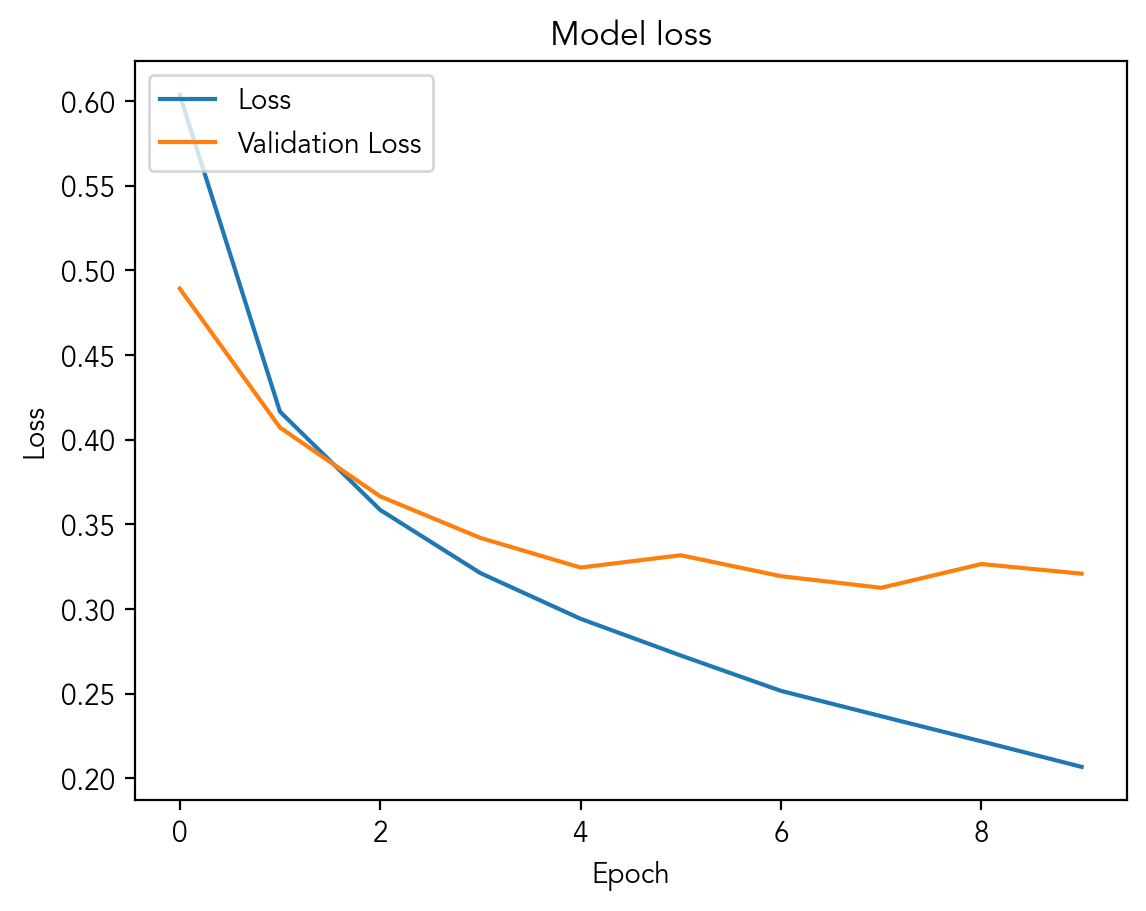

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Validation Loss'], loc='upper left')